# `PyTorch` basics

29/7/22

This notebook is just working through the [Learn the basics](https://pytorch.org/tutorials/beginner/basics/intro.html) tutorial on the PyTorch website. i.e. no original work. Though I **highly recommned** carrying out this course by yourself as it is a fantastic introduction to the philosophy of `PyTorch` and you'll have trained your first network within a couple hours!

In [24]:
import torch 
import numpy as np

import matplotlib.pyplot as plt

## Tensors

Like `numpy` arrays but optimised for differentiation, running on GPUs etc. 

In [2]:
data = [
    [1,2],
    [3,4]
]

x_data = torch.tensor(data)

In [5]:
# possible to create a tensor from np array 
np_array = np.array(data)

x_np = torch.from_numpy(np_array)

x_np

tensor([[1, 2],
        [3, 4]])

In [6]:
# possible to create a tensor with the same properties e.g. 
torch.ones_like(x_data)

tensor([[1, 1],
        [1, 1]])

In [9]:
shape = (2,3,) # why the extra comma? like numpy

rand_tensor = torch.rand(shape)

rand_tensor

tensor([[0.9266, 0.2153, 0.7633],
        [0.7205, 0.0686, 0.0397]])

In [11]:
# we can get attr from a tensor 
tensor = rand_tensor
(tensor.shape, tensor.dtype, tensor.device)

(torch.Size([2, 3]), torch.float32, device(type='cpu'))

In [12]:
# no dedicated graphics is available here 
torch.cuda.is_available()

False

note that the indexing, slicing etc. is the same as `numpy`

In [15]:
# matrix mult 
tensor @ tensor.T
# element-wise product 
tensor * tensor 
# sum up elements
tensor_sum = tensor.sum()
tensor_sum

tensor(2.7340)

In [17]:
# can then change back to a python type
tensor_sum.item()

2.7339863777160645

In [20]:
# inplace ops denoted by '_' i.e. this stays in stores the results to the tensor e.g. 
print(tensor)
print('\n')
tensor.add_(5)
print(tensor)

tensor([[10.9266, 10.2153, 10.7633],
        [10.7205, 10.0686, 10.0397]])


tensor([[15.9266, 15.2153, 15.7633],
        [15.7205, 15.0686, 15.0397]])


## Datasets & Dataloaders

two options:
- `torch.utils.data.Dataset` which stores samples and their labels 
- `torch.utils.data.DataLoader` wraps an iterable over `Dataset` for easy access

Here is an example with the 'Fashion MNIST' dataset which is images from an online shoppping store

In [89]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor 

In [22]:
training_data = datasets.FashionMNIST(
    root = 'data', 
    train = True, 
    download = True, 
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    download = True, 
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



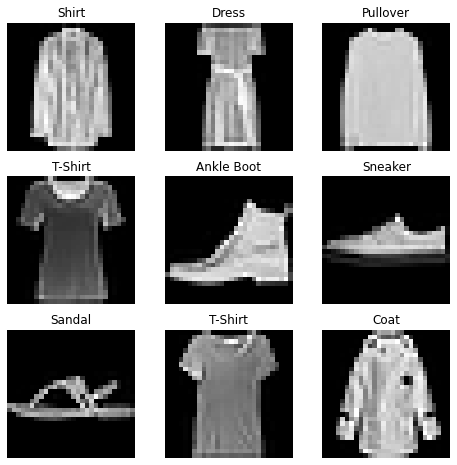

In [26]:
# example of some of the photos loading in 
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

It is also fairly easy to load in your own data too by making a class for it

## Transforms

transforms are used to manipulate data so it is suitable for training. Again using the 'Fashion MNIST' dataset but now loading with the dataset with the `target_transform` param

In [30]:
from torchvision.transforms import Lambda

training_data = datasets.FashionMNIST(
    root = 'data', 
    train = True, 
    download = True, 
    transform = ToTensor(), 
    target_transform = Lambda( \ # Lambda just applies a lambda transform to some data
        lambda y: torch.zeros(10,dtype=torch.float).scatter( \
        0, torch.tensor(y), value=1))
)
# transform turns the image into a normalised FloatTensor
# target transform turns the label 0..9 to a one-hot encoded tensor 

## Building a neural network 

using `torch.nn`

In [35]:
from torch import nn

In [64]:
# all nn classes are subclasses of `nn.Module` 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # flatten 28x28 image in to 784 long tensor
        self.flatten = nn.Flatten()
        
        # indicates to sequentially apply these layers 
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # correct input dims 
            nn.ReLU(), # activation func. 
            nn.Linear(512, 512), # must match output dims of prev layer
            nn.ReLU(), # activation func. 
            nn.Linear(512, 10), # must mtch output dims of prev layer
        )                       # output must be same as the number of categories 

    # feed forward but running the sequential network defined above
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [65]:
# move the model to the correct device
device = 'cude' if torch.cuda.is_available() else 'cpu'
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [66]:
# get some data and put it on our device
X = torch.rand(1,28,28, device=device)

# get the output (this calls the feedforward method)
logits = model(X)

# use the softmax to get a normalised probablilities
pred_probab = nn.Softmax(dim=1)(logits)

# take the maximum prediction as our probablility
# dim is the dimension along which they must sum to 1 
y_pred = pred_probab.argmax(1)
print(y_pred)

tensor([6])


In [71]:
print(f'Model structure: {model}\n\n')

for name, param in model.named_parameters():
    
    print(f'Layer: {name} Size: {param.size()} Values: {param[:2]}')

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight Size: torch.Size([512, 784]) Values: tensor([[ 0.0208,  0.0196, -0.0198,  ...,  0.0235,  0.0162, -0.0154],
        [-0.0146,  0.0345, -0.0272,  ...,  0.0086, -0.0291, -0.0116]],
       grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias Size: torch.Size([512]) Values: tensor([-0.0273,  0.0100], grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight Size: torch.Size([512, 512]) Values: tensor([[ 0.0159, -0.0260, -0.0437,  ..., -0.0296,  0.0197,  0.0351],
        [-0.0264,  0.0182,  0.0182,  ...,  0.0374, -0.0138,  0.0354]],
       grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.bias Size: torch.Size([512])

## `torch.autograd`

now things get cool... automatic backprop

In [72]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [73]:
# ---- x ----> w.x + b ----> z 
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [76]:
print(z.grad_fn)
print(loss.grad_fn)

In [77]:
# now compute the loss with loss.backward()
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0008, 0.2894, 0.2991],
        [0.0008, 0.2894, 0.2991],
        [0.0008, 0.2894, 0.2991],
        [0.0008, 0.2894, 0.2991],
        [0.0008, 0.2894, 0.2991]])
tensor([0.0008, 0.2894, 0.2991])


In [83]:
# stop stop tracking grads using a few methods
z_det = z.detach()
print(z_det.requires_grad)
# or
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

False
False


you may want to disable parameters if you are freezing some parameters i.e. if you are finetuning a pre-trained network 

It also speeds up computations when you are only doing forwards passes

In [86]:
torch.ones_like(inp)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [87]:
# the eye-dentity matrix
inp = torch.eye(5, requires_grad=True) 

# (1+x)**2
out = (inp+1).pow(2)

# calc. grad. 
# arg of ones in same shape as ?
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"First call\n{inp.grad}")

# find the grad. again
# see from output that the grad was added again! i.e. it is accumulated!
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

# once zero'd and grad taken it just returns to what it was in the first place
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


## Optimisation 

use SGD to optimise parameters

In [97]:
# load in the data as before
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# use the data loader to get the batches for test and training 
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        
        # use initialisation of NeuralNetwork class
        super(NeuralNetwork, self).__init__()
        
        # flatten the input 
        self.flatten = nn.Flatten()
        # define structure
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        
    # define forward pass
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# create an instance of the class
model = NeuralNetwork()

In [98]:
# these are chosen hyperparams and can be optimised via a grid-search
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [99]:
# initialize the loss function
loss_fn = nn.CrossEntropyLoss()

# initialise the optimiser
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [100]:
# here we get a gradient for ea. batch i.e. loop over all the data once per epoch
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [101]:
# now test the model via going forward 
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [102]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300344  [    0/60000]
loss: 2.297369  [ 6400/60000]
loss: 2.278675  [12800/60000]
loss: 2.270706  [19200/60000]
loss: 2.256630  [25600/60000]
loss: 2.207586  [32000/60000]
loss: 2.226221  [38400/60000]
loss: 2.186733  [44800/60000]
loss: 2.190598  [51200/60000]
loss: 2.152398  [57600/60000]
Test Error: 
 Accuracy: 34.7%, Avg loss: 2.151632 

Epoch 2
-------------------------------
loss: 2.164182  [    0/60000]
loss: 2.159115  [ 6400/60000]
loss: 2.103575  [12800/60000]
loss: 2.121792  [19200/60000]
loss: 2.062730  [25600/60000]
loss: 1.993672  [32000/60000]
loss: 2.027059  [38400/60000]
loss: 1.947025  [44800/60000]
loss: 1.962007  [51200/60000]
loss: 1.878268  [57600/60000]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.880725 

Epoch 3
-------------------------------
loss: 1.915229  [    0/60000]
loss: 1.885717  [ 6400/60000]
loss: 1.772597  [12800/60000]
loss: 1.820922  [19200/60000]
loss: 1.694139  [25600/60000]
loss: 1.642138  [32000/600